In [1]:
import chisquare_v4 as cs
import matplotlib.pyplot as plt
import numpy as np
import graphics as gs
import importlib

In [2]:
print (cs.dicmod)
    
print (cs.array_Z)

#reload(cs)

{'Z': 0, 'Age': 1, 'ebv': 2, 'uJava': 3, 'F378': 4, 'F395': 5, 'F410': 6, 'F430': 7, 'gSDSS': 8, 'F515': 9, 'rSDSS': 10, 'F660': 11, 'iSDSS': 12, 'F861': 13, 'zSDSS': 14}
['0001', '0002', '0005', '0010', '0015', '0020', '0030', '0050', '0080', '0100', '0152', '0200', '0300', '0400', '0500']


In [3]:
#clusters=np.loadtxt('clusters.txt',usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
photometry_strings=np.loadtxt('results/photometry-cat.txt',usecols=[0,1],dtype=str)
photometry=np.loadtxt('results/photometry-cat.txt',usecols=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])

print(len(photometry))

cluster=np.zeros((len(photometry_strings),27))
print(len(cluster))
cluster[:,3:27]=photometry
l=0
param = np.loadtxt('results/parameter-cat.txt',usecols=[5,3,7])
Z = param[l,0]
age = param[l,1]
ebv = param[l,2]

array_obs = np.array(photometry[l,0:12])
#print(array_obs)
array_err = np.array(photometry[l,12:24])
#print(array_err)
table = cs.load_table('tables/mag1.dat') 
Z_aprox_L = np.argmin(abs(table[:,0]-Z))
Z_aprox = table[Z_aprox_L,0]
    
age_aprox_L = np.argmin(abs(table[:,1]-age))
age_aprox = table[age_aprox_L,1]

ebv_aprox_L = np.argmin(abs(table[:,2]-ebv))
ebv_aprox = table[ebv_aprox_L,2]

print(Z_aprox, age_aprox, ebv_aprox)   
for i in range(len(table)):
       if(table[i,0]==Z_aprox):
            if(table[i,1]==age_aprox):
                if(table[i,2]==ebv_aprox):
                    age_L = i
                    #print(age_L)
                    
array_mod = table[age_L,3:]

obs = np.array([array_obs, array_err, array_mod])
print (obs)

34
34
0.0001 3980000.0 0.0
[[1.6327e+01 1.6722e+01 1.6588e+01 1.5169e+01 1.4941e+01 1.2222e+01
  1.4114e+01 1.1572e+01 1.3973e+01 1.1538e+01 1.3144e+01 1.1973e+01]
 [2.4000e-02 2.9000e-02 2.7000e-02 1.4000e-02 1.3000e-02 4.0000e-03
  8.0000e-03 3.0000e-03 7.0000e-03 2.0000e-03 5.0000e-03 3.0000e-03]
 [1.9840e+00 1.9990e+00 1.9210e+00 1.9280e+00 1.9870e+00 2.0920e+00
  2.2100e+00 2.4680e+00 2.5790e+00 2.7420e+00 2.8860e+00 2.9890e+00]]


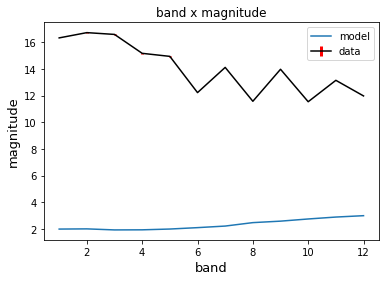

In [4]:
x=range(1,13)

plt.errorbar(x,obs[0],yerr=obs[1],color='black', ecolor='red', 
             elinewidth=3, capsize=0, label= 'data')
plt.title('band x magnitude')
plt.xlabel('band', fontsize = 13)
plt.ylabel('magnitude', fontsize = 13)
plt.plot(x,obs[2],label='model')
plt.legend()
plt.show()

In [5]:
bands1=(['uJava','uJava','uJava','uJava','F378','F378', 'F430', 'gSDSS', 'F660', 'F861', 'uJava'])
band_ref1=(['F660','rSDSS','iSDSS','zSDSS','F515','gSDSS', 'gSDSS', 'zSDSS', 'gSDSS', 'uJava', 'F515'])
bands2=(['iSDSS','rSDSS','uJava','F378','F410','F430', 'F515', 'F660', 'F660', 'gSDSS', 'iSDSS'])
band_ref2=(['zSDSS','zSDSS','zSDSS','zSDSS','zSDSS','iSDSS', 'zSDSS', 'F861', 'iSDSS', 'zSDSS', 'F861'])

In [32]:
importlib.reload(cs)
nomes=photometry_strings[:,0]
print ("Before: ("+str(Z)+','+str(age)+','+str(ebv)+')')
chi_ebv, chi_Z,chi_age=cs.full_fit(cs.load_table('tables/mag1.dat'),
           cluster, l,
           (['uJava','uJava','uJava','uJava','F378','F378', 'F430', 'gSDSS', 'F660', 'F861', 'uJava']),
           (['F660','rSDSS','iSDSS','zSDSS','F515','gSDSS', 'gSDSS', 'zSDSS', 'gSDSS', 'uJava', 'F515']),
           #cs.load_table('best5_100age.dat')[-5,0:11],
           np.ones(11),
           (['iSDSS','rSDSS','uJava','F378','F410','F430', 'F515', 'F660', 'F660', 'gSDSS', 'iSDSS']),
           (['zSDSS','zSDSS','zSDSS','zSDSS','zSDSS','iSDSS', 'zSDSS', 'F861', 'iSDSS', 'zSDSS', 'F861']),
           np.ones(11),
           #cs.load_table('best5_100Z_test6.dat')[-5,0:11])1:29
           (['F660','gSDSS','rSDSS','F378','F378','F410', 'F410', 'F660', 'F410', 'F378', 'iSDSS']),
           (['iSDSS','F861','F861','F395','gSDSS','F430', 'F515', 'F861', 'gSDSS', 'F660', 'F861']),
           np.ones(11))
           #cs.load_table('best5_100Z_test6.dat')[-5,0:11])tables
np.set_printoptions(precision=2)
chi_Z=np.log10((chi_Z[0]/(1-chi_Z[0]-(0.2485+(1.78*chi_Z[0]))))/(0.0207)),np.log10(chi_Z[1]),chi_Z[2]

print ("After: ("+str(chi_Z[0])+','+str(chi_Z[1])+','+str(chi_Z[2])+')')


Before: (-1.19,10.02,0.0804)
After: (0.3363094375090441,9.14921911265538,0.0)


In [33]:
chi_after, chi_before

NameError: name 'chi_after' is not defined

In [34]:
importlib.reload(cs)
sigma=0
#print(chi[1], chi[0], ebv, sigma, dt, numbands)
fit1 = cs.data_sint(chi_before[1], chi_before[0], chi_before[2], sigma)    #fazer a mão, colocando as mesmas cores da idade para metalicidade
fit2 = cs.data_sint(chi_after[1], chi_after[0], chi_after[2], sigma)    
 
x=range(1,13)

#colocar os melhores modelos escolhidos nas duas etapas de fitting para ver a aproximação do modelo. 
#para isso eu teria que salvar os parametros das duas etapas

plt.errorbar(x,obs[0],yerr=obs[1],color='black', ecolor='red', 
             elinewidth=3, capsize=0, label= 'data')
plt.title('band x magnitude')
plt.xlabel('band', fontsize = 13)
plt.ylabel('magnitude', fontsize = 13)
plt.plot(x,obs[2],label='model')
plt.plot(x,fit1[2],label='fit1')
plt.plot(x,fit2[2],label='fit2')
plt.legend()
plt.show()

NameError: name 'chi_before' is not defined

In [35]:
#esse plot não é mais necessário

x = cs.cores(fit2[2], np.zeros((len(fit2[2]))), bands1, band_ref1) #Fit
y = cs.cores(obs[2], np.zeros((len(obs[2]))), bands1, band_ref1) #modelo
z = cs.cores(obs[0], obs[1], bands1, band_ref1) #Observado
a=range(1,12)

plt.errorbar(a,z[0],np.sqrt(2)*z[1],color='black', ecolor='red', label= 'data')
plt.title('color  x magnitude') 
plt.xlabel('color', fontsize = 13)
plt.ylabel('magnitude', fontsize = 13)
plt.plot(a,y[0],label='model')
plt.scatter(a,x[0],label='fit')
plt.legend()
plt.show()

NameError: name 'fit2' is not defined

In [36]:
a = np.sum(np.square((z[0]-y[0])/np.sqrt(2)*z[1]))
b = np.sum(np.square((z[0]-x[0])/np.sqrt(2)*z[1]))

NameError: name 'z' is not defined

In [37]:
reload(cs)
cs.multiplot(chi_after[3])

NameError: name 'reload' is not defined